<a href="https://colab.research.google.com/github/nurindahpuspa16/Python-Projects/blob/main/RPS_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-17 08:58:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.46MB/s    in 58s     

2021-06-17 08:59:06 (5.30 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmn')
zip_ref.close()
 


In [ ]:
os.listdir('/tmn/rockpaperscissors')

['README_rpc-cv-images.txt', 'paper', 'rock', 'rps-cv-images', 'scissors']

In [ ]:
base_dir = '/tmn'
train_dir = os.path.join(base_dir, 'rockpaperscissors')


In [ ]:
base_dir = '/tmn/rockpaperscissors'
validation_dir = os.path.join(base_dir, 'rps-cv-images')

In [ ]:
os.listdir(train_dir)

['README_rpc-cv-images.txt', 'paper', 'rock', 'rps-cv-images', 'scissors']

In [ ]:
os.listdir(validation_dir)

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

In [ ]:
# membuat direktori gunting pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')
 
# membuat direktori batu pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori kertas pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori gunting pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
 
# membuat direktori batu pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori kertas pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        classes=["scissors", "paper","rock"])
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        classes=["scissors", "paper","rock"])

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
                    epochs=20,
                    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                    validation_steps=5)  # berapa batch yang akan dieksekusi pada setiap epoch

Epoch 1/20
25/25 [==============================] - 8s 268ms/step - loss: 0.6649 - accuracy: 0.4100 - val_loss: 0.6489 - val_accuracy: 0.3500
Epoch 2/20
25/25 [==============================] - 7s 261ms/step - loss: 0.6477 - accuracy: 0.2800 - val_loss: 0.6768 - val_accuracy: 0.1000
Epoch 3/20
25/25 [==============================] - 6s 255ms/step - loss: 0.6423 - accuracy: 0.3500 - val_loss: 0.6426 - val_accuracy: 0.3000
Epoch 4/20
25/25 [==============================] - 6s 255ms/step - loss: 0.6395 - accuracy: 0.3100 - val_loss: 0.6407 - val_accuracy: 0.3000
Epoch 5/20
25/25 [==============================] - 6s 254ms/step - loss: 0.6368 - accuracy: 0.3600 - val_loss: 0.6317 - val_accuracy: 0.2000
Epoch 6/20
25/25 [==============================] - 6s 254ms/step - loss: 0.6290 - accuracy: 0.4100 - val_loss: 0.6071 - val_accuracy: 0.6000
Epoch 7/20
25/25 [==============================] - 6s 256ms/step - loss: 0.5752 - accuracy: 0.6000 - val_loss: 0.4774 - val_accuracy: 0.8000
Epoch 

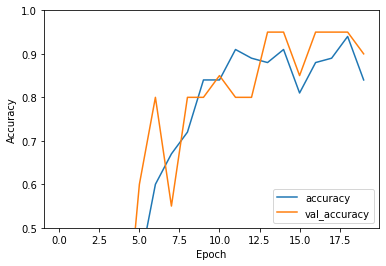

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



Saving blue_abstract_background_310971.jpg to blue_abstract_background_310971.jpg
blue_abstract_background_310971.jpg
[[0. 1. 0.]]
paper


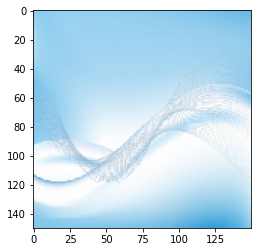

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)

  print(classes)
  if classes[0][0]==1:
    print('scissors')
  elif classes[0][1]==1:
    print('paper')
  else:
    print('rock')